In [263]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/trevormcdonough/Desktop/ET_Project/data-storage/merged_data.csv")

# Setting when each of the city's casinos opened 
casino_openings = {
    'Everett': 2019, 'Springfield': 2018, 'Schenectady': 2017,
    'Clark_County': 2015, 'Cincinatti': 2013, 'Baltimore': 2014,
    'Des_Plaines': 2011, 'Columbus': 2012, 'Oxford': 2012
}



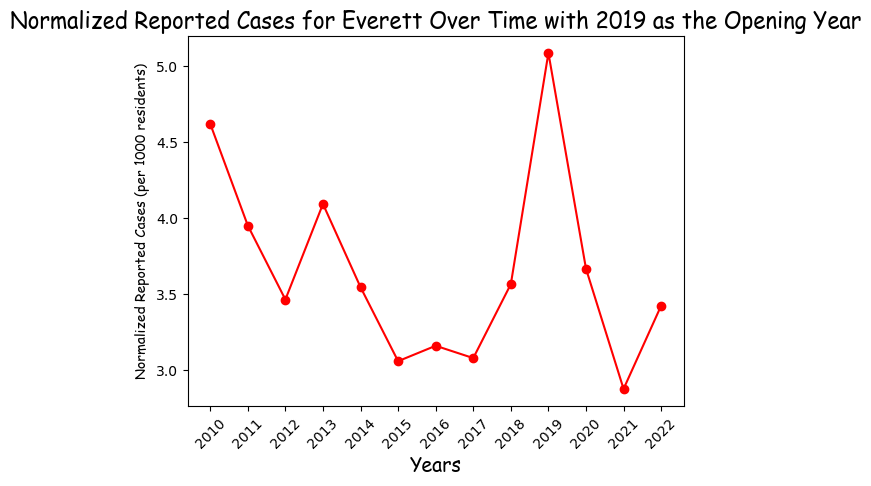

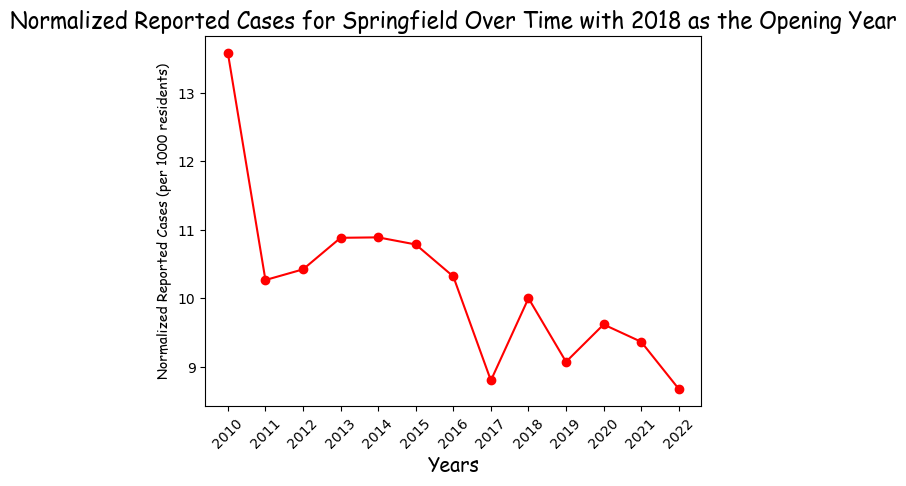

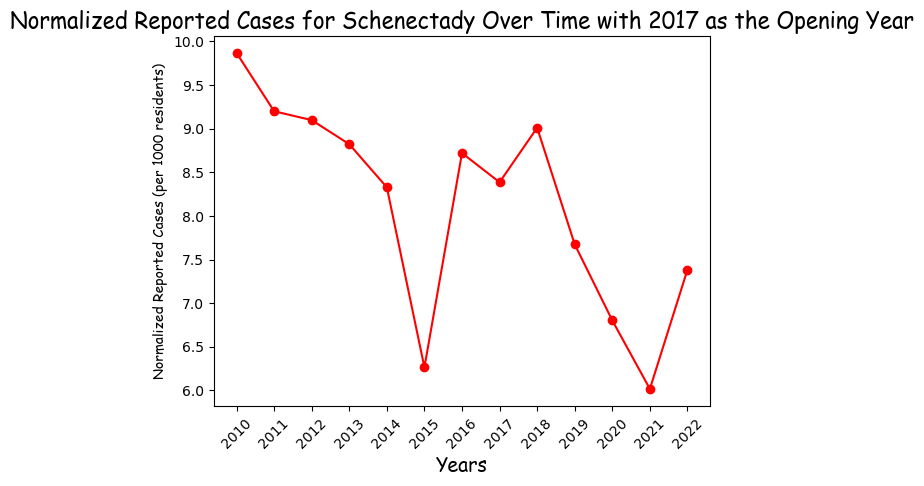

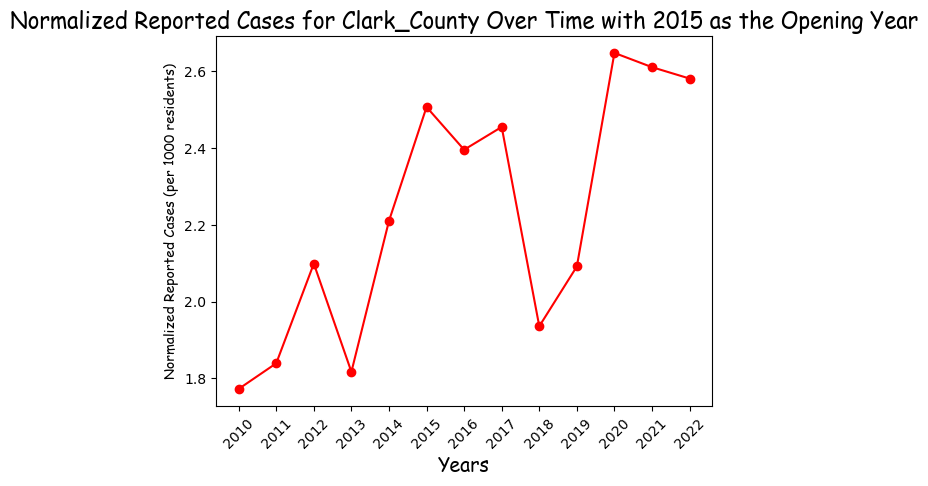

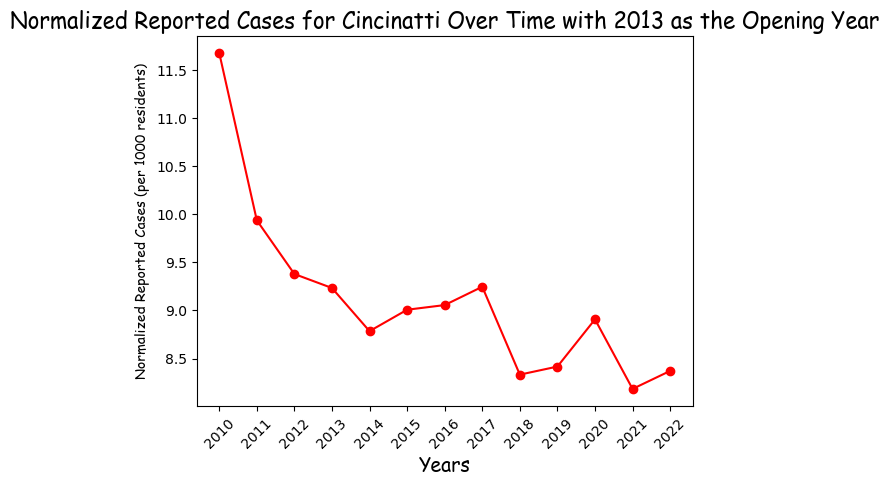

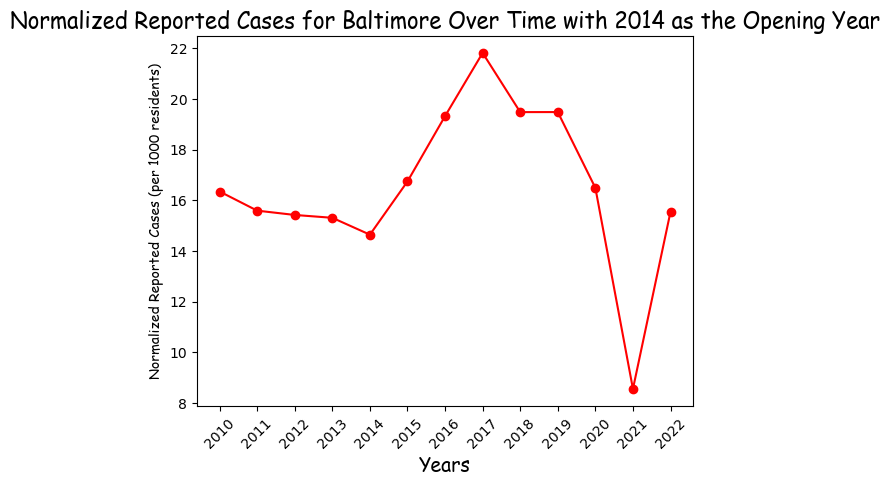

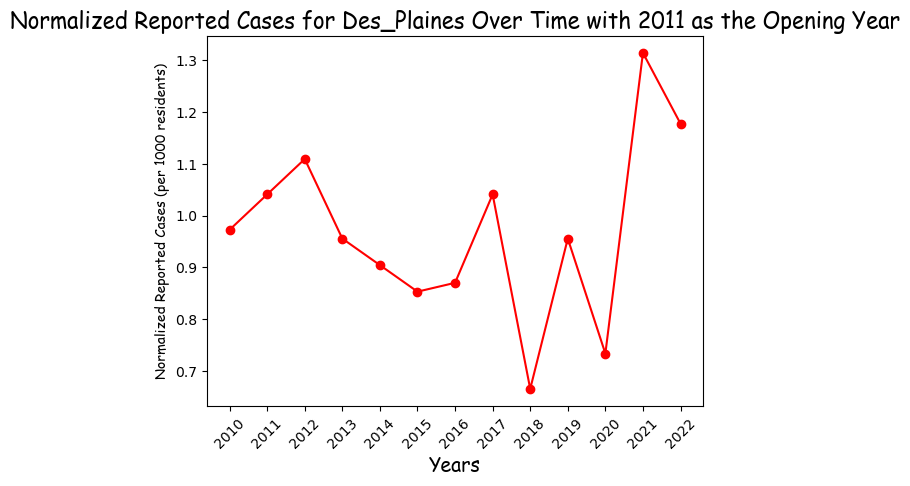

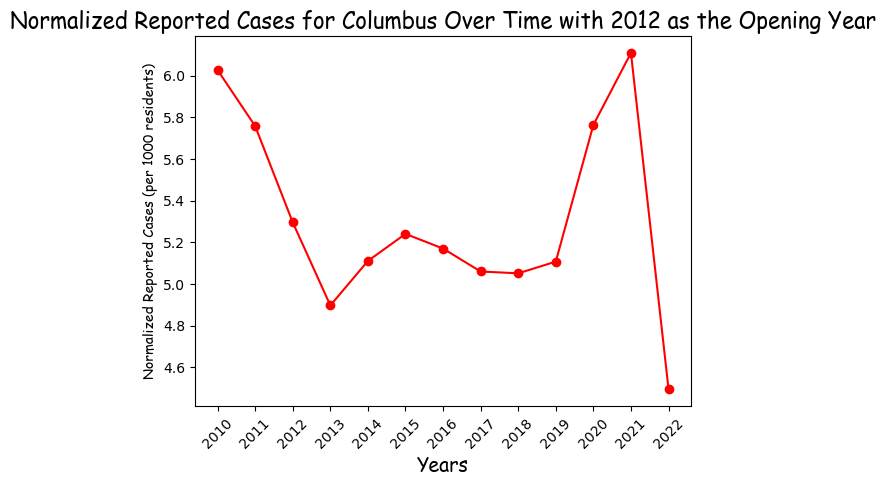

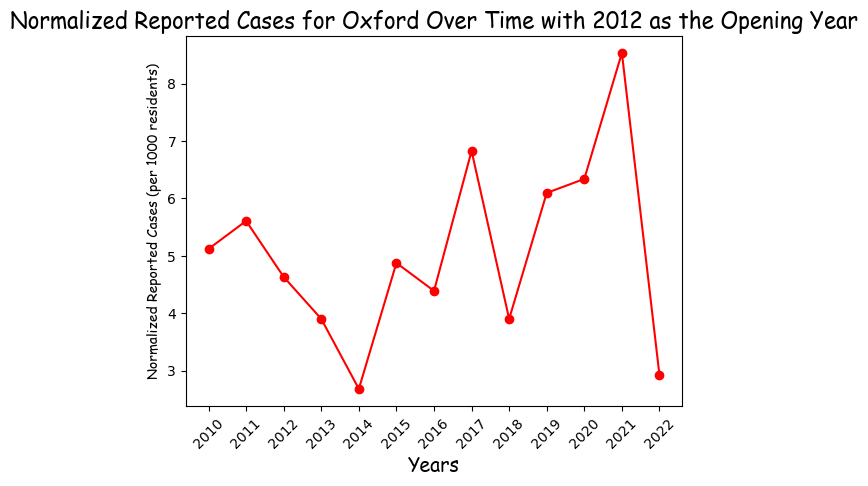

In [278]:

# Putting the population of each city into a frame
population_data = {
    'Everett': 49350,
    'Springfield': 154064,
    'Schenectady': 68809,
    'Clark_County': 134831,
    'Cincinatti': 309513,
    'Baltimore': 569931,
    'Des_Plaines': 58594,
    'Columbus': 907971,
    'Oxford': 4101
}

# Creating the same line graphs as above but instead now adjusting the data to reflect the crime cases per 1000 people

for city, opening_year in casino_openings.items():
    city_df = df[df['City'] == city]
    reported_df = city_df[city_df['series'] == 'Reported'].drop(columns=['City', 'series']).transpose()
    population = population_data[city]
    normalized_reported_df = (reported_df / population) * 1000  # Per 1000 residents

    plt.plot(normalized_reported_df, marker='o', color='red', linestyle='-')
    plt.xlabel("Years", fontsize = 14, family = 'Comic Sans MS')
    plt.ylabel("Normalized Reported Cases (per 1000 residents)", color='black', family = 'Comic Sans MS')
    plt.title(f"Normalized Reported Cases for {city} Over Time with {opening_year} as the Opening Year", color='black', fontsize=16, family='Comic Sans MS')
    plt.xticks(rotation=45)
    plt.show()


In [173]:
# Just displaying a Data Frame of the data with the Opening Year to the side 

df_show = df[df['series'] == 'Reported']

df_show['Opening Year'] = df_show['City'].map(casino_openings)

df_show

/var/folders/wk/xm22vzb55n3fnyd0bgl8dgkh0000gn/T/ipykernel_73000/1843724633.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_show['Opening Year'] = df_show['City'].map(casino_openings)


,City,series,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Opening Year
1,Baltimore,Reported,9316,8886,8789,8725,8346,9542,11010.0,12430.0,11100.0,11101.0,9398.0,4880.0,8861.0,2014
3,Cincinatti,Reported,3615,3076,2903,2858,2719,2788,2803.0,2862.0,2579.0,2605.0,2757.0,2533.0,2591.0,2013
5,Clark_County,Reported,239,248,283,245,298,338,323.0,331.0,261.0,282.0,357.0,352.0,348.0,2015
7,Columbus,Reported,5472,5228,4808,4446,4640,4758,4694.0,4594.0,4586.0,4637.0,5233.0,5547.0,4082.0,2012
9,Des_Plaines,Reported,57,61,65,56,53,50,51.0,61.0,39.0,56.0,43.0,77.0,69.0,2011
11,Everett,Reported,228,195,171,202,175,151,156.0,152.0,176.0,251.0,181.0,142.0,169.0,2019
13,Oxford,Reported,21,23,19,16,11,20,18.0,28.0,16.0,25.0,26.0,35.0,12.0,2012
15,Schenectady,Reported,679,633,626,607,573,431,600.0,577.0,620.0,528.0,468.0,414.0,508.0,2017
17,Springfield,Reported,2093,1582,1606,1677,1678,1662,1590.0,1356.0,1541.0,1398.0,1482.0,1443.0,1337.0,2018


In [230]:
# Filter the data for Springfield
springfield_df = df[df['City'] == 'Springfield']

# Extract reported cases DataFrame for years before and after 2017
before_2017 = springfield_df[springfield_df['series'] == 'Reported'].iloc[:, 2:9]  # Columns for years 2017-2022
after_2017 = springfield_df[springfield_df['series'] == 'Reported'].iloc[:, 10:]  # Columns for years 2017-2022

# Adjust the reported cases by population
population_springfield = population_data['Springfield']
adjusted_springfield_before_2017 = before_2017.divide(population_springfield) * 1000  # Adjusted per 1000 residents
adjusted_springfield_after_2017 = after_2017.divide(population_springfield) * 1000  # Adjusted per 1000 residents

# Show adjusted reported cases

print(adjusted_springfield_before_2017)
print(adjusted_springfield_after_2017)


         2010      2011       2012       2013       2014       2015       2016
17  13.585263  10.26846  10.424239  10.885087  10.891578  10.787725  10.320386
         2018      2019      2020      2021      2022
17  10.002337  9.074151  9.619379  9.366237  8.678212


In [231]:
# Getting the mean of the crime rates before and after the casino opened 
mean_before_springfield = adjusted_springfield_before_2017.mean(axis=1)
print(f"Mean: {mean_before_springfield}")
mean_after_springfield = adjusted_springfield_after_2017.mean(axis=1)
print(f"Mean: {mean_after_springfield}")

Mean: 17    11.023248
dtype: float64
Mean: 17    9.348063
dtype: float64


In [232]:
# Doing the same as above but for the rest of the cities

everett_df = df[df['City'] == 'Everett']
before_2019 = everett_df[everett_df['series'] == 'Reported'].iloc[:, 2:11]  
after_2019 = everett_df[everett_df['series'] == 'Reported'].iloc[:, 12:]  
population_everett = population_data['Everett']
adjusted_everett_before_2019 = before_2019.divide(population_everett) * 1000  
adjusted_everett_after_2019 = after_2019.divide(population_everett) * 1000  

print(adjusted_everett_before_2019)
print(adjusted_everett_after_2019)

        2010      2011      2012      2013      2014      2015      2016  \
11  4.620061  3.951368  3.465046  4.093212  3.546099  3.059777  3.161094   

        2017      2018  
11  3.080041  3.566363  
       2020      2021      2022
11  3.66768  2.877406  3.424519


In [233]:
mean_before_everett = adjusted_everett_before_2019.mean(axis=1)
print(f"Mean: {mean_before_everett}")
mean_after_everett = adjusted_everett_after_2019.mean(axis=1)
print(f"Mean: {mean_after_everett}")

Mean: 11    3.615896
dtype: float64
Mean: 11    3.323202
dtype: float64


In [234]:
schenectady_df = df[df['City'] == 'Schenectady']
before_2017 = schenectady_df[schenectady_df['series'] == 'Reported'].iloc[:, 2:9] 
after_2017 = schenectady_df[schenectady_df['series'] == 'Reported'].iloc[:, 10:] 
population_schenectady = population_data['Schenectady']
adjusted_schenectady_before_2017 = before_2017.divide(population_schenectady) * 1000 
adjusted_schenectady_after_2017 = after_2017.divide(population_schenectady) * 1000  

print(adjusted_schenectady_before_2017)
print(adjusted_schenectady_after_2017)

        2010      2011      2012     2013      2014      2015     2016
15  9.867895  9.199378  9.097647  8.82152  8.327399  6.263716  8.71979
        2018      2019      2020      2021      2022
15  9.010449  7.673415  6.801436  6.016655  7.382755


In [235]:

mean_before_schenectady = adjusted_schenectady_before_2017.mean(axis=1)
print(f"Mean: {mean_before_schenectady}")
mean_after_schenectady = adjusted_schenectady_after_2017.mean(axis=1)
print(f"Mean: {mean_after_schenectady}")

Mean: 15    8.613906
dtype: float64
Mean: 15    7.376942
dtype: float64


In [236]:
clark_county_df = df[df['City'] == 'Clark_County']
before_2015 = clark_county_df[clark_county_df['series'] == 'Reported'].iloc[:, 2:7]  
after_2015 = clark_county_df[clark_county_df['series'] == 'Reported'].iloc[:, 8:]  

population_clark_county = population_data['Clark_County']
adjusted_clark_county_before_2015 = before_2015.divide(population_clark_county) * 1000  
adjusted_clark_county_after_2015 = after_2015.divide(population_clark_county) * 1000  

print(adjusted_clark_county_before_2015)
print(adjusted_clark_county_after_2015)

       2010     2011      2012     2013      2014
5  1.772589  1.83934  2.098924  1.81709  2.210174
       2016      2017      2018      2019      2020      2021      2022
5  2.395592  2.454925  1.935757  2.091507  2.647759  2.610676  2.581009


In [237]:
mean_before_clark_county = adjusted_clark_county_before_2015.mean(axis=1)
print(f"Mean: {mean_before_clark_county}")
mean_after_clark_county = adjusted_clark_county_after_2015.mean(axis=1)
print(f"Mean: {mean_after_clark_county}")

Mean: 5    1.947623
dtype: float64
Mean: 5    2.388175
dtype: float64


In [238]:
cincinatti_df = df[df['City'] == 'Cincinatti']
before_2013 = cincinatti_df[cincinatti_df['series'] == 'Reported'].iloc[:, 2:5] 
after_2013 = cincinatti_df[cincinatti_df['series'] == 'Reported'].iloc[:, 6:] 

population_cincinatti = population_data['Cincinatti']
adjusted_cincinatti_before_2013 = before_2013.divide(population_cincinatti) * 1000  
adjusted_cincinatti_after_2013 = after_2013.divide(population_cincinatti) * 1000  

print(adjusted_cincinatti_before_2013)
print(adjusted_cincinatti_after_2013)

        2010      2011      2012
3  11.679639  9.938193  9.379251
       2014      2015      2016      2017      2018      2019      2020  \
3  8.784768  9.007699  9.056162  9.246784  8.332445  8.416448  8.907542   

       2021      2022  
3  8.183824  8.371215  


In [239]:
mean_before_cincinatti = adjusted_cincinatti_before_2013.mean(axis=1)
print(f"Mean: {mean_before_cincinatti}")
mean_after_cincinatti = adjusted_cincinatti_after_2013.mean(axis=1)
print(f"Mean: {mean_after_cincinatti}")

Mean: 3    10.332361
dtype: float64
Mean: 3    8.700765
dtype: float64


In [240]:
baltimore_df = df[df['City'] == 'Baltimore']
before_2014 = baltimore_df[baltimore_df['series'] == 'Reported'].iloc[:, 2:6]  
after_2014 = baltimore_df[baltimore_df['series'] == 'Reported'].iloc[:, 7:]  

population_baltimore = population_data['Baltimore']
adjusted_baltimore_before_2014 = before_2014.divide(population_baltimore) * 1000  
adjusted_baltimore_after_2014 = after_2014.divide(population_baltimore) * 1000  

print(adjusted_baltimore_before_2014)
print(adjusted_baltimore_after_2014)

        2010       2011       2012       2013
1  16.345838  15.591361  15.421165  15.308871
        2015       2016       2017       2018       2019       2020     2021  \
1  16.742378  19.318128  21.809658  19.476042  19.477796  16.489715  8.56244   

        2022  
1  15.547496  


In [241]:
mean_before_baltimore = adjusted_baltimore_before_2014.mean(axis=1)
print(f"Mean: {mean_before_baltimore}")
mean_after_baltimore = adjusted_baltimore_after_2014.mean(axis=1)
print(f"Mean: {mean_after_baltimore}")

Mean: 1    15.666809
dtype: float64
Mean: 1    17.177957
dtype: float64


In [242]:
Des_Plaines_df = df[df['City'] == 'Des_Plaines']
before_2011 = Des_Plaines_df[Des_Plaines_df['series'] == 'Reported'].iloc[:, 2:3] 
after_2011 = Des_Plaines_df[Des_Plaines_df['series'] == 'Reported'].iloc[:, 4:] 

population_des_plaines = population_data['Des_Plaines']
adjusted_des_plaines_before_2011 = before_2011.divide(population_des_plaines) * 1000  
adjusted_des_plaines_after_2011 = after_2011.divide(population_des_plaines) * 1000  

print(adjusted_des_plaines_before_2011)
print(adjusted_des_plaines_after_2011)

       2010
9  0.972796
       2012      2013      2014     2015      2016      2017      2018  \
9  1.109329  0.955729  0.904529  0.85333  0.870396  1.041062  0.665597   

       2019      2020      2021      2022  
9  0.955729  0.733864  1.314128  1.177595  


In [243]:
mean_before_des_plaines = adjusted_des_plaines_before_2011.mean(axis=1)
print(f"Mean: {mean_before_des_plaines}")
mean_after_des_plaines = adjusted_des_plaines_after_2011.mean(axis=1)
print(f"Mean: {mean_after_des_plaines}")

Mean: 9    0.972796
dtype: float64
Mean: 9    0.961935
dtype: float64


In [244]:
Columbus_df = df[df['City'] == 'Columbus']
before_2012 = Columbus_df[Columbus_df['series'] == 'Reported'].iloc[:, 2:4] 
after_2012 = Columbus_df[Columbus_df['series'] == 'Reported'].iloc[:, 5:] 

population_columbus = population_data['Columbus']
adjusted_columbus_before_2012 = before_2012.divide(population_columbus) * 1000  
adjusted_columbus_after_2012 = after_2012.divide(population_columbus) * 1000  

print(adjusted_columbus_before_2012)
print(adjusted_columbus_after_2012)

       2010      2011
7  6.026624  5.757893
       2013      2014      2015      2016      2017      2018      2019  \
7  4.896632  5.110295  5.240255  5.169769  5.059633  5.050822  5.106991   

     2020      2021      2022  
7  5.7634  6.109226  4.495738  


In [245]:
mean_before_columbus = adjusted_columbus_before_2012.mean(axis=1)
print(f"Mean: {mean_before_columbus}")
mean_after_columbus = adjusted_columbus_after_2012.mean(axis=1)
print(f"Mean: {mean_after_columbus}")

Mean: 7    5.892259
dtype: float64
Mean: 7    5.200276
dtype: float64


In [246]:
# Final city of our calculations 

Oxford_df = df[df['City'] == 'Oxford']
before_2012 = Oxford_df[Oxford_df['series'] == 'Reported'].iloc[:, 2:4]  
after_2012 = Oxford_df[Oxford_df['series'] == 'Reported'].iloc[:, 5:]  

population_oxford = population_data['Oxford']
adjusted_oxford_before_2012 = before_2012.divide(population_oxford) * 1000  
adjusted_oxford_after_2012 = after_2012.divide(population_oxford) * 1000  

print(adjusted_oxford_before_2012)
print(adjusted_oxford_after_2012)

        2010      2011
13  5.120702  5.608388
        2013      2014      2015      2016      2017      2018      2019  \
13  3.901487  2.682273  4.876859  4.389173  6.827603  3.901487  6.096074   

        2020      2021      2022  
13  6.339917  8.534504  2.926116  


In [247]:
mean_before_oxford = adjusted_oxford_before_2012.mean(axis=1)
print(f"Mean: {mean_before_oxford}")
mean_after_oxford = adjusted_oxford_after_2012.mean(axis=1)
print(f"Mean: {mean_after_oxford}")

Mean: 13    5.364545
dtype: float64
Mean: 13    5.047549
dtype: float64


In [248]:
# Now creating a mean of all of our sample cities to use in a t-test

combined_after_df = pd.concat([mean_after_oxford, mean_after_columbus, mean_after_baltimore, mean_after_cincinatti, mean_after_clark_county, mean_after_schenectady, mean_after_des_plaines, mean_after_everett, mean_after_springfield])
after_mean = combined_after_df.mean()
after_mean

6.613873830409473

In [249]:
combined_before_df = pd.concat([mean_before_oxford, mean_before_columbus, mean_before_baltimore, mean_before_cincinatti, mean_before_clark_county, mean_before_schenectady, mean_before_des_plaines, mean_before_everett, mean_before_springfield])
before_mean = combined_before_df.mean()
before_mean

7.047715873483199

In [250]:
# Also the standard deviation

after_sd = combined_after_df.std()
after_sd

4.861765643824671

In [251]:
before_sd = combined_before_df.std()
before_sd

4.77227145111483

(array([3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1]),
 [Text(0, 3.5, '3.5'),
  Text(0, 3.6, '3.6'),
  Text(0, 3.7, '3.7'),
  Text(0, 3.8, '3.8'),
  Text(0, 3.9, '3.9'),
  Text(0, 4.0, '4.0'),
  Text(0, 4.1, '4.1')])

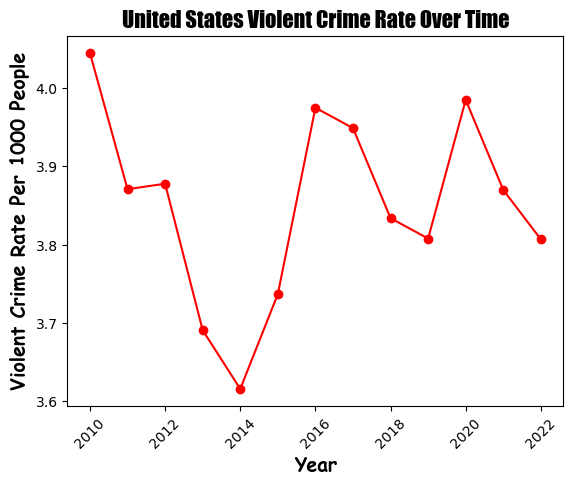

In [276]:
# Getting the required 'population data' for the t-test by using the US Violent Crime rate per 1000 residents 

data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Violent Crime Rate': [4.045, 3.871, 3.878, 3.691, 3.616, 3.737, 3.975, 3.949, 3.834, 3.808, 3.985, 3.87, 3.807]
}

crime_rates_us_df = pd.DataFrame(data)

plt.plot(crime_rates_us_df['Year'], crime_rates_us_df['Violent Crime Rate'], marker='o', color='red', linestyle='-')
plt.title('United States Violent Crime Rate Over Time', color='black', fontsize=16, fontweight='bold', family='fantasy')
plt.xlabel('Year', color='black', fontsize=14, fontweight='bold', family='Comic Sans MS')
plt.ylabel('Violent Crime Rate Per 1000 People', color='black', fontsize=14, fontweight='bold', family = 'Comic Sans MS')
plt.xticks(color='black', rotation=45)  
plt.yticks(color='black') 


In [253]:
#Displaying a dataframe of the collected data above 

crime_rates_us_df

,Year,Violent Crime Rate
0,2010,4.045
1,2011,3.871
2,2012,3.878
3,2013,3.691
4,2014,3.616
5,2015,3.737
6,2016,3.975
7,2017,3.949
8,2018,3.834
9,2019,3.808


In [254]:
# Getting the population mean

crime_rates_us_df.mean()

Year                  2016.000000
Violent Crime Rate       3.851231
dtype: float64

In [255]:
import math

# Using our previously collected sample mean value and our number of samples to get the t-value

us_crime_rate_mean = 3.851231
n = 9
t_value = (after_mean - us_crime_rate_mean)/(after_sd/math.sqrt(n))
t_value


1.7047157552227141

In [256]:

from scipy.stats import t
import numpy as np


# Using the .cdf function to get our needed P-Value 

df = 8
p_value = 1 - t.cdf(t_value, df)
p_value

0.06332273850168779

In [257]:
# Rejecting or failing to reject the null hypothesis

alpha = 0.05
if p_value > alpha:
    print("Fail to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

Fail to reject null hypothesis.


In [262]:
# Now doing a two tailed two sample t test to seee if there is a statistically significant difference between the means
n = 9

# Calculating the t-statistic and degrees of freedom
t_statistic = (before_mean - after_mean) / np.sqrt((before_sd**2 / n) + (after_sd**2 / n))
df = 2 * n - 2

# Calculating the p-value (two-tailed test)
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df))

p_value

0.8508917785512051

In [261]:
# Rejecting or failing to reject the null hypothesis

alpha = 0.05
if p_value > alpha:
    print("Fail to reject null hypothesis.")
else:
    print("Reject null hypothesis.")

Fail to reject null hypothesis.
